### How do the results change if we also vary the lead time/implementation of the measures?
Model version 14/10/2020, git branch *Add_lead_time_toX*

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from ema_workbench import load_results

C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\urban-SETP\lib\site-packages\ema_workbench\em_framework\evaluators.py:21: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn(
C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\urban-SETP\lib\site-packages\ema_workbench\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)


In [2]:
foldername = "temp"
subfolder = "experiments"
target = os.path.join(foldername,subfolder)

experiments, outcomes = load_results(os.path.join(target,"2020_10_15_EMA_experiments.tar.gz"))
experiments.head(n=3)

,Housing_market,SLR,implementation_time,transient,Mayor,scenario,policy,model
0,rational,6,5,19.0,R. Active,0,0,Rotty
1,rational,6,7,13.0,R. Active,1,0,Rotty
2,rational,2,5,5.0,R. Active,2,0,Rotty


In [3]:
experiments2 = experiments.drop(['policy','model'],axis=1)
experiments2.head(n=3)

,Housing_market,SLR,implementation_time,transient,Mayor,scenario
0,rational,6,5,19.0,R. Active,0
1,rational,6,7,13.0,R. Active,1
2,rational,2,5,5.0,R. Active,2


In [4]:
experiments3 = experiments2.copy()
map_house_market = {'rational' : 0, 
             'boundedly_rational' :1}
map_mayor = {'H. Economicus': 1,
             'Sentiment' : 2,
             'R. Active' : 0,
             'Lawkeeper' : 3}

experiments3['Housing_market'].replace(map_house_market,inplace=True)
experiments3['Mayor'].replace(map_mayor,inplace=True)
experiments3[['Housing_market', 'SLR', 'transient', 'Mayor']].astype('float')
experiments3.head(n=3)

,Housing_market,SLR,implementation_time,transient,Mayor,scenario
0,0,6,5,19.0,0,0
1,0,6,7,13.0,0,1
2,0,2,5,5.0,0,2


In [5]:
pd.DataFrame(outcomes)['CC_first_SETP'].unique()

array([9999, 2111, 2138, 2094, 2097, 2096, 2086, 2195, 2120, 2085, 2105,
       2128, 2098, 2205, 2102, 2123, 2156, 2149, 2088, 2079, 2110, 2095,
       2104, 2141, 2084, 2134, 2113, 2146, 2093, 2163, 2092, 2115, 2080,
       2077, 2192, 2082, 2099, 2076, 2126, 2161, 2154, 2089, 2145, 2173,
       2171, 2186, 2151, 2137, 2078, 2147, 2091, 2199, 2103, 2196, 2184,
       2114, 2122, 2108, 2189, 2100, 2101, 2219, 2150, 2121, 2087, 2201,
       2178, 2210, 2083, 2117, 2172, 2107, 2158, 2106, 2139, 2187, 2165,
       2109, 2177, 2182, 2148, 2180, 2181, 2130, 2152, 2129, 2112, 2116,
       2216, 2135, 2188, 2198, 2215, 2155, 2185, 2168, 2132, 2197, 2193],
      dtype=int64)

In [6]:
from datetime import datetime

#CREATE SUBFOLDER IN VISUALISATION WITH CURRENT DATE
today = datetime.date(datetime.now())
date = "{}_{}_{}".format(today.year,today.month,today.day)
foldername = date
target = os.path.join('Visualisations',foldername)
if not os.path.exists(target):
    os.mkdir(target)
else:
    print("Target folder {} already exists".format(target))

### Feature scoring

C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\urban-SETP\lib\site-packages\ema_workbench\analysis\prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive "


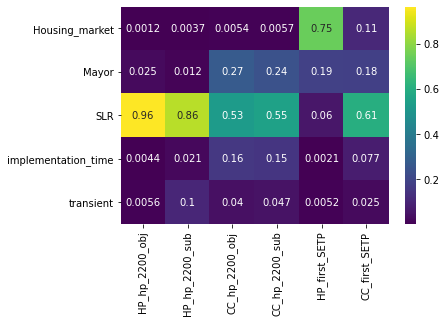

In [7]:
from ema_workbench.analysis import feature_scoring
x = experiments3
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap='viridis', annot=True)

In [8]:
map_mayor
invert_map_mayor = {}

for key,value in map_mayor.items():
    invert_map_mayor[value] = key
invert_map_mayor

{1: 'H. Economicus', 2: 'Sentiment', 0: 'R. Active', 3: 'Lawkeeper'}

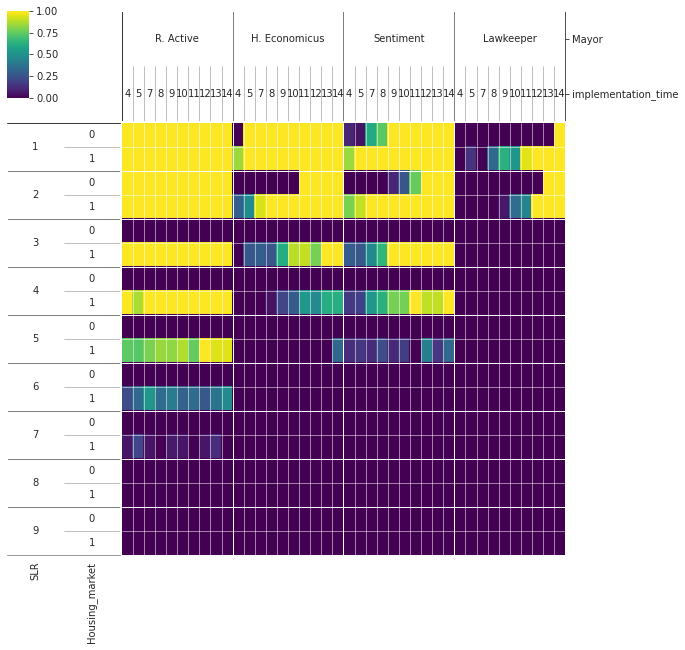

In [10]:
from ema_workbench.analysis import dimensional_stacking

x = experiments3
y = outcomes['CC_first_SETP'] <2200
#y = outcomes['CC_first_SETP'] 

fig = dimensional_stacking.create_pivot_plot(x,y, nr_levels=2, nbins=4,categories=True)

horizontal_texts = fig._axstack._elements[2][1][1].texts
for i,text in enumerate(horizontal_texts):
    if i % 11 == 0: #it's a mayor text
        text._text = invert_map_mayor[i//11]
        
    else:
            values = [4,5,7,8,9,10,11,12,13,14]
            index = int(text._text)-1
            text._text = str(values[index])
fig.savefig(fname=os.path.join(target,'newdimstack.png'),bbox_inches='tight',dpi=150)

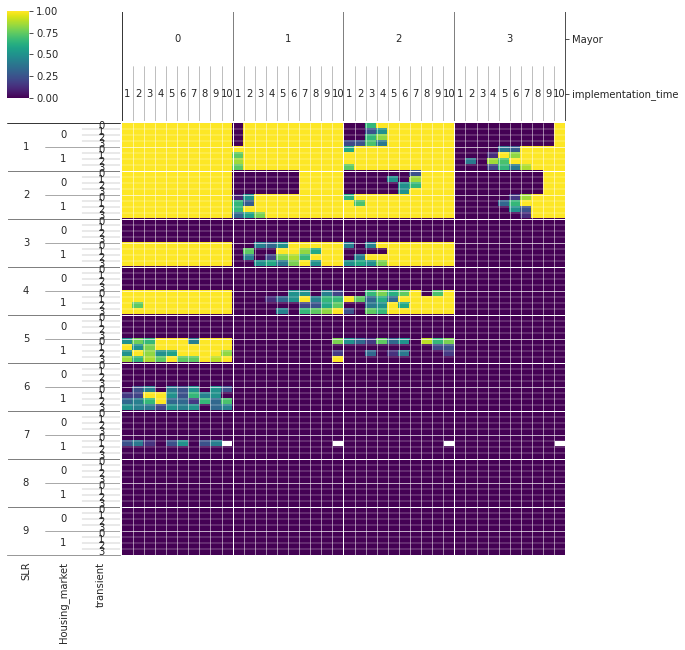

In [11]:
from ema_workbench.analysis import dimensional_stacking

x = experiments3
y = outcomes['CC_first_SETP'] <2200
#y = outcomes['CC_first_SETP'] 

fig = dimensional_stacking.create_pivot_plot(x,y, nr_levels=3, nbins=4,categories=True)